This is the first in a series of posts about constructing a predictive model, based on physical measurements, of the age of abalone, where abalone referes to a group of sea snails. In this post, we are going to go over the dataset and provide some descriptive statics. The dataset that we are going to use and other related information can be accessed from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Abalone). 

Before we start our analysis, let us import all the required Python librariesa and load our dataset as pandas dataframe. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

column_names = ["sex", "length", "diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", 
                "shell_weight", "rings"]
dataset = pd.read_csv("abalone.data", names=column_names)

dataset.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


As the first step, we should have a look at the description of the dataset and get a rough idea about we are dealing with. According to the metadata, the dataset contains 4,177 labeled observations. Predictor or independent variables are all either real-valued or integer, overall 8 in number. The target or dependent variable is integer-valued and signifies the number of rings that a given abalone has. By adding 1.5 to the number of rings one can judge about the age of the ablaone. 

It is worth mentioning that there are no missing values for this dataset (observations with missing data poitns have been excluded from the dataset we get to work with). This significantly reduces work load and minimizes room for error as fewer assumptions need to be made about how to treat observations with missing values. Also, there are no experts to consult with and ask about their professional opinion. 

Numeric predictor variables have been standardized beforehand to facilitate analysis and are pretty self-explanatory. Thus, we are not going to waste too much time going over what each one of them means exactly. However, we can observe that there 4 distinct weight measures. According to the dataset description, whole weight refers to the whole abalone, shucked weight refers to the weight of meat, viscera weight refers to the gut weight (after bleeding) and shell weight is weight after being dried. 

We further observe that sex variable is of nominal type. It has 3 distinct values: M for male, F for female and I for infant. Due to its type, this variable cannot be directly used by most of the predictive models, like regression, neural networs, etc. For that reason, we need to transform it to a numeric type. There are a number of ways in which this can be accomplished. For example, we could introduce dummy variables. This approach would allow us to better separate instances belonging to different sexes at the price of increased degrees of freedom. Or, alternatively, we could just use a numeric encoding scheme. Numeric encoding leaves the number of attributes unchaged but we are running the risk that certain models may incorrectly interpret classes that have closer encoding as being similar in their interpretations. For that reason, let us check if there is a clear difference in the number of rings for different sexes.

In [2]:
pd.pivot_table(dataset, values="rings", columns="sex", aggfunc=np.mean)

sex,F,I,M
rings,11.129304,7.890462,10.705497


It comes as no surprise that the average number of rings for infant abalone is smaller than that of grown abalone. For grown female and male abalone, the average number of rings looks to be about equal. Thus, we could transform sex variable into another variable that will have two values: "infant" and "grown". However, by doing this, we might get in trouble if sex variable correlates with other predictor variable. To avoid any of the mentioned problems, we will introduce dummy variables and keep all 3 distinct values.

In [3]:
dataset = pd.concat([pd.get_dummies(dataset.sex, prefix='sex'), dataset.drop(['sex'], axis=1)], axis=1)
dataset.head()

,sex_F,sex_I,sex_M,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Next, we are going to have a look at descriptive statistics for the variables in the dataset.

In [4]:
dataset.describe()

,sex_F,sex_I,sex_M,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.312904,0.321283,0.365813,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.463731,0.467025,0.481715,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.000000,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.000000,0.000000,0.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,1.000000,1.000000,1.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,1.000000,1.000000,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


As per above table, we have about equal distribution between female, male and infant abalone in the dataset. The average number of rings is about 10 while the median number of rings is 9. This means that the distribution of our target variable is skewed to the right and the longer right tail "pulls" the center of probability mass towards itself. 

We can also observe that the smallest value for height variable is 0. Let us investigate these observations.

In [5]:
dataset[(dataset.height==0)]

,sex_F,sex_I,sex_M,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
1257,0,1,0,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,0,1,0,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


There are 2 observations with 0 height. While it is possible that the true recorded values for these observations got rounded down during data collection, we will treat them as erroneous and remove then from subsequent analysis.

In [6]:
dataset = dataset[(dataset.height) != 0]

Having spotted some possible inaccuracies, we should investigate further and make sure that the remaining observations make sense to us. For example, we would expect the whole weight of abalone to be larger than constituent parts.

In [7]:
dataset[(dataset.whole_weight <= dataset.shucked_weight) | (dataset.whole_weight <= dataset.viscera_weight) | (dataset.whole_weight <= dataset.shell_weight)]

,sex_F,sex_I,sex_M,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
1216,0,1,0,0.310,0.225,0.070,0.1055,0.4350,0.0150,0.0400,5
2627,0,1,0,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5
2641,0,1,0,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7
3086,0,1,0,0.355,0.270,0.075,0.2040,0.3045,0.0460,0.0595,7


There are 4 observations for which this is not the case. In particular, for all 4 observations, shucked weight exceeds whole weight. We will be consistent in our treatment and assume that these are erroneous observations.

In [8]:
dataset = dataset[(dataset.shucked_weight < dataset.whole_weight)]

Without expert knowledge, it is hard to make educated decisions about validity of "size" variables of abalone, i.e. length, diameter and height. Thus, for the purposes of this analysis, we will assume that all remaining observations are valid. 

While descriptive statistics provides us with valuable information about our data, it is always important to have a look at visualizations as they can reveal patterns and connections that cannot be expressed in pure numeric fashion. We will start off by looking at distributions of each of the variables separately. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f45d410>,
      dtype=object)

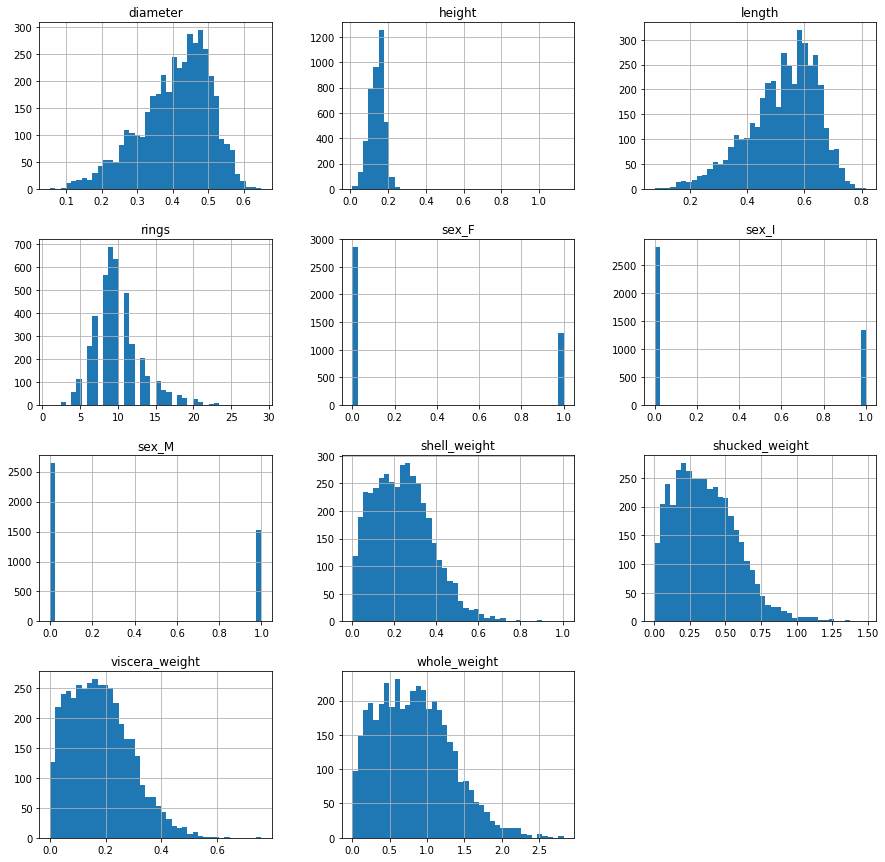

In [9]:
dataset.hist(figsize=(15, 15), bins=40)

As we previously suspected, the distribution of the target variable, rings, is slighly skewed to the right, i.e. the right tail is longer. At the same time, it roughly resembles a normal, bell-shaped distribution. This further means that we can treat this problem as a regression problem. All "weight" variables are also skewed to the right. The shapes of their respective distributions look similar to the shape of a lognormally distributed random variable. This futher hints at a possibility of using some kind of variable transformation to "normalize" the variables. 

Diameter and length variables are, on the other hand, slightly left skewed with distribution shapes resembling closely a normal distribution. These variables are in no need of any special preprocessing.

Correlation and bivariate analyses are a natural continuation of a univariate analysis. We are going to create a correlation matrix in what follows.

In [10]:
corr = dataset.corr()
corr

,sex_F,sex_I,sex_M,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
sex_F,1.000000,-0.463744,-0.513647,0.308932,0.317916,0.297608,0.298946,0.263853,0.307707,0.305885,0.249521
sex_I,-0.463744,1.000000,-0.521963,-0.550321,-0.563221,-0.516913,-0.556403,-0.522132,-0.554998,-0.546525,-0.434816
sex_M,-0.513647,-0.521963,1.000000,0.235524,0.239368,0.214073,0.251028,0.251625,0.241233,0.234781,0.180863
length,0.308932,-0.550321,0.235524,1.000000,0.986771,0.827785,0.925239,0.899307,0.902849,0.898301,0.555716
diameter,0.317916,-0.563221,0.239368,0.986771,1.000000,0.833985,0.925430,0.894555,0.899550,0.905978,0.573696
height,0.297608,-0.516913,0.214073,0.827785,0.833985,1.000000,0.819566,0.776671,0.798553,0.819281,0.556870
whole_weight,0.298946,-0.556403,0.251028,0.925239,0.925430,0.819566,1.000000,0.970463,0.966334,0.955889,0.539407
shucked_weight,0.263853,-0.522132,0.251625,0.899307,0.894555,0.776671,0.970463,1.000000,0.932912,0.884058,0.421111
viscera_weight,0.307707,-0.554998,0.241233,0.902849,0.899550,0.798553,0.966334,0.932912,1.000000,0.908040,0.502798
shell_weight,0.305885,-0.546525,0.234781,0.898301,0.905978,0.819281,0.955889,0.884058,0.908040,1.000000,0.627368


Let us investigate the resulting correlation matrix in more detail and see whether we can find some interesting patterns. We are especially interested in correlations between the dependent variable and predictor variables. First of all, we observe that there is a positive correlation between the number of rings and variables that represent "size" of abalone, i.e. length, diameter and height. The same applies to variables representing weight measures, whole weight, shucked weight, viscera weight and shell weight. This makes absolute sense as we would expect older abalone to be bigger, in terms of both weight and size, than younger abalone. 

If we look at correlations between the number of rings and the dummy variables that we created for sex variable, we observe that there is negative correlation between the number of rings and the dummy variable representing whether a given abalone is an infant or not. At the same time, the correlations between the number of rings and other two dummy variables are very similar. Thus, in retrospect, we could have created a single variable that would just signify a grown abalone. However, we are going to keep 3 dummy variables and see how our model performs regardless.
While we considered how the dependent variable is related to the predictor variables, it is also important to consider if any two of the independent variables are correlated. Usually, when building predictive models, we try to avoid having highly correlated predictors. Note, however, that it becomes very tedious to go over each pair of variables in the above table. For that reason, we are going to create a simple heat map.

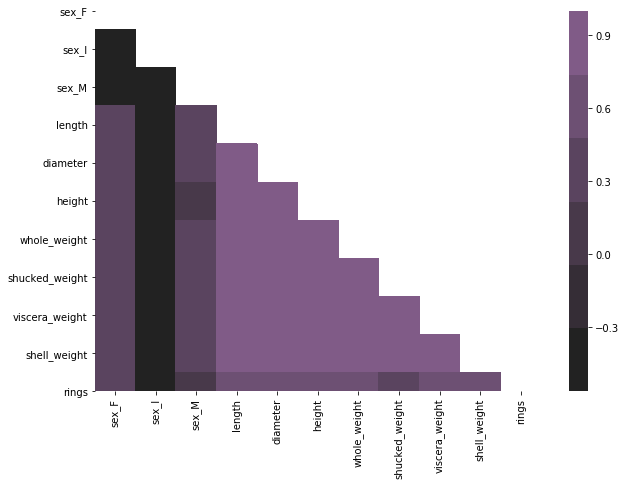

In [11]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, ax=ax, mask=mask, cmap=sns.dark_palette("muted purple", input="xkcd"))

According to the heat map, all the variables that concern size or weight of abalone are highly correlated. We can also observe that most of the variables are negatively correlated with the dummy variable representing infant abalone. Thus, we may speculate that this dummy variable is going to be very important in the predictor model that we are going to construct. The remaing dummy variables representing sex are moderately correlated with other predictor variables. 

It looks like our data is pretty tidy which means that we can start to build some predictive models. We are going to cover some of the algorithms in the next post. 

In [12]:
dataset.to_csv('clean_data')